### Python code
### Paper - "People Detection using Artificial Intelligence with Panchro-matic Satellite Images"


#### Modules import

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

import arcpy
from arcpy.ia import TrainDeepLearningModel
import zipfile
import os

from arcgis.learn import FasterRCNN, prepare_data
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from fastai.vision.transform import get_transforms, rand_pad, flip_lr, brightness, contrast, rotate, zoom
import zipfile
import os

In [21]:
item_zip_path = '/arcgis/home/training_data_15cm/training_data_15.zip'

In [22]:
extract_path = '/arcgis/home/training_data_unzip_15cm'

with zipfile.ZipFile(item_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [23]:
data_path=extract_path

In [24]:
train_transforms, val_transforms = get_transforms(do_flip=True, flip_vert=True, max_rotate=45.0, max_zoom=1.5, max_warp=0.3)

PASCAL_VOC_rectangles
['background', 'person']


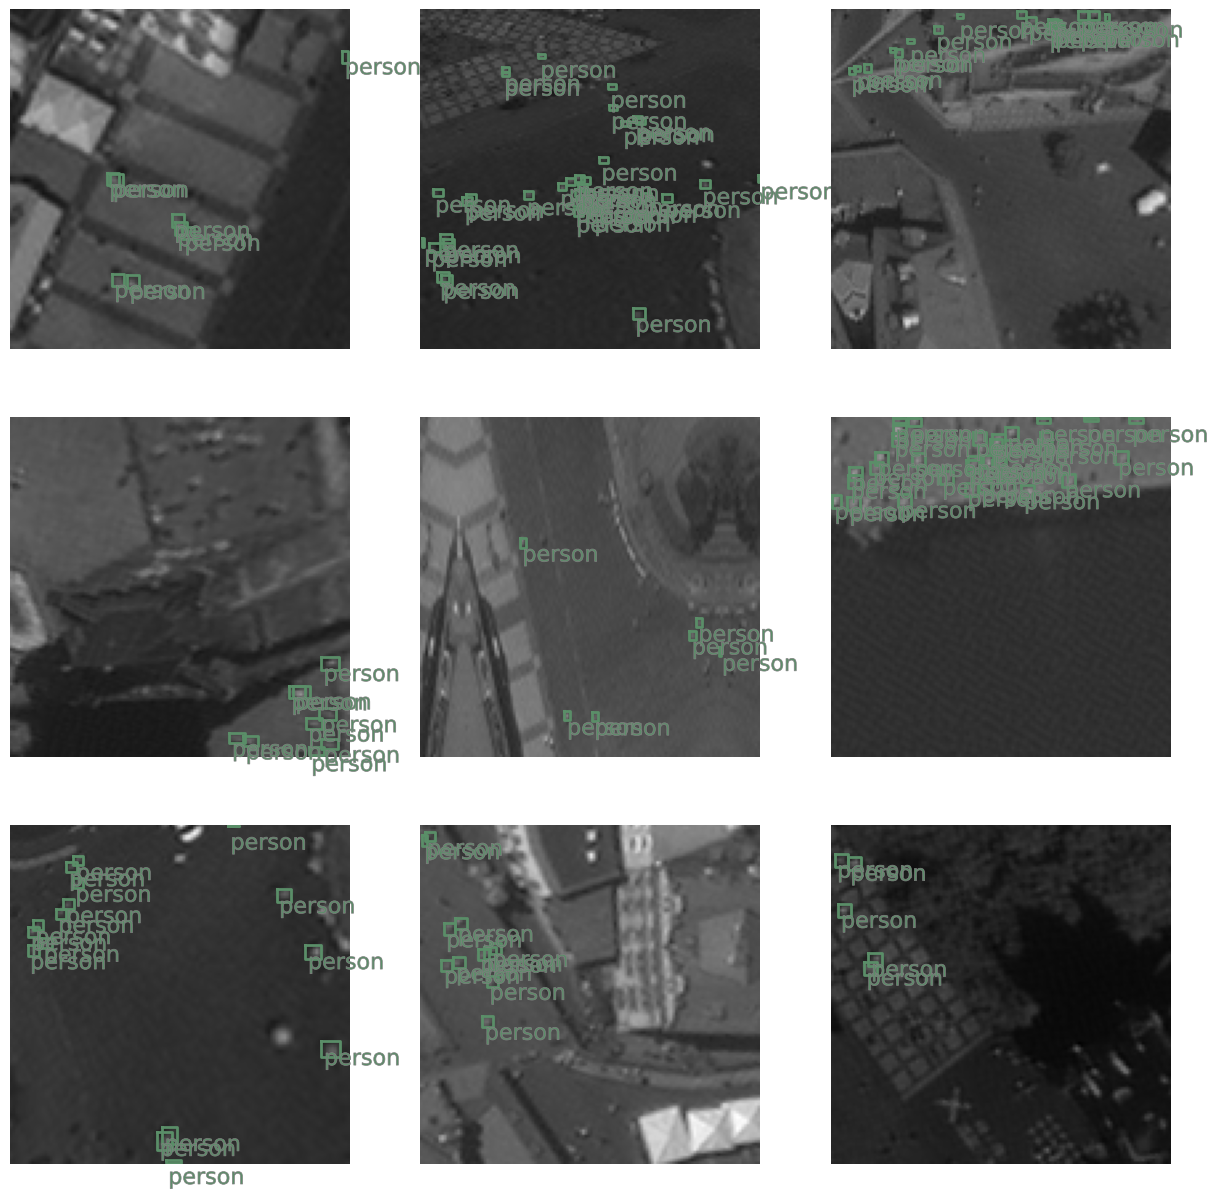

In [25]:
data = prepare_data(data_path, 
                    class_mapping={1: 'person'}, 
                    batch_size=16, 
                    val_split_pct=0.2, 
                    dataset_type='PASCAL_VOC_rectangles', 
                    transforms=[train_transforms, val_transforms])
print(data.dataset_type)
print(data.classes)
data.show_batch()

In [26]:
model = FasterRCNN(data, backbone='resnet152', backend='pytorch')

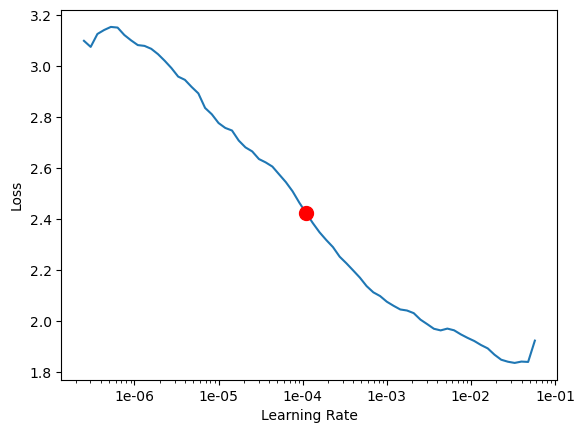

In [27]:
lr_val = model.lr_find()

In [28]:
optimal_lr= lr_val

In [29]:
optimal_lr

0.00010964781961431851

In [30]:
model.fit(epochs=150, lr=optimal_lr, early_stopping=False)

epoch,train_loss,valid_loss,average_precision,time
0,2.723369,2.879591,0.000000,00:04
1,2.520808,2.777007,0.000000,00:04
2,2.428330,2.722901,0.000000,00:04
3,2.331336,2.619320,0.000000,00:04
4,2.280600,2.477241,0.000000,00:04
5,2.210691,2.306340,0.000000,00:04
6,2.129512,2.130001,0.002890,00:04
7,2.047513,1.967953,0.096142,00:04
8,1.949676,1.742009,0.110560,00:04
9,1.854355,1.522534,0.092722,00:04


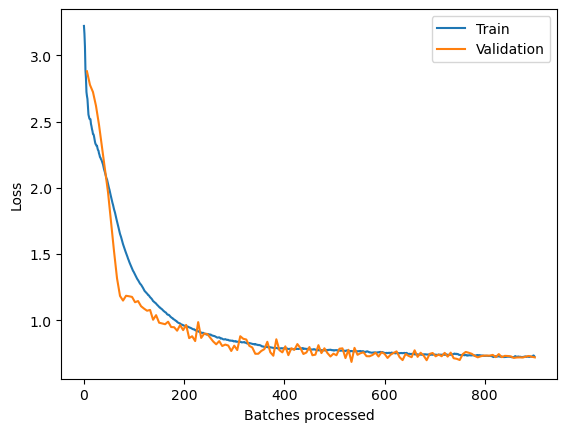

In [31]:
import matplotlib.pyplot as plt
model.learn.recorder.plot_losses()
plt.show()

In [32]:
model.average_precision_score()

{'person': 0.48652264341936186}

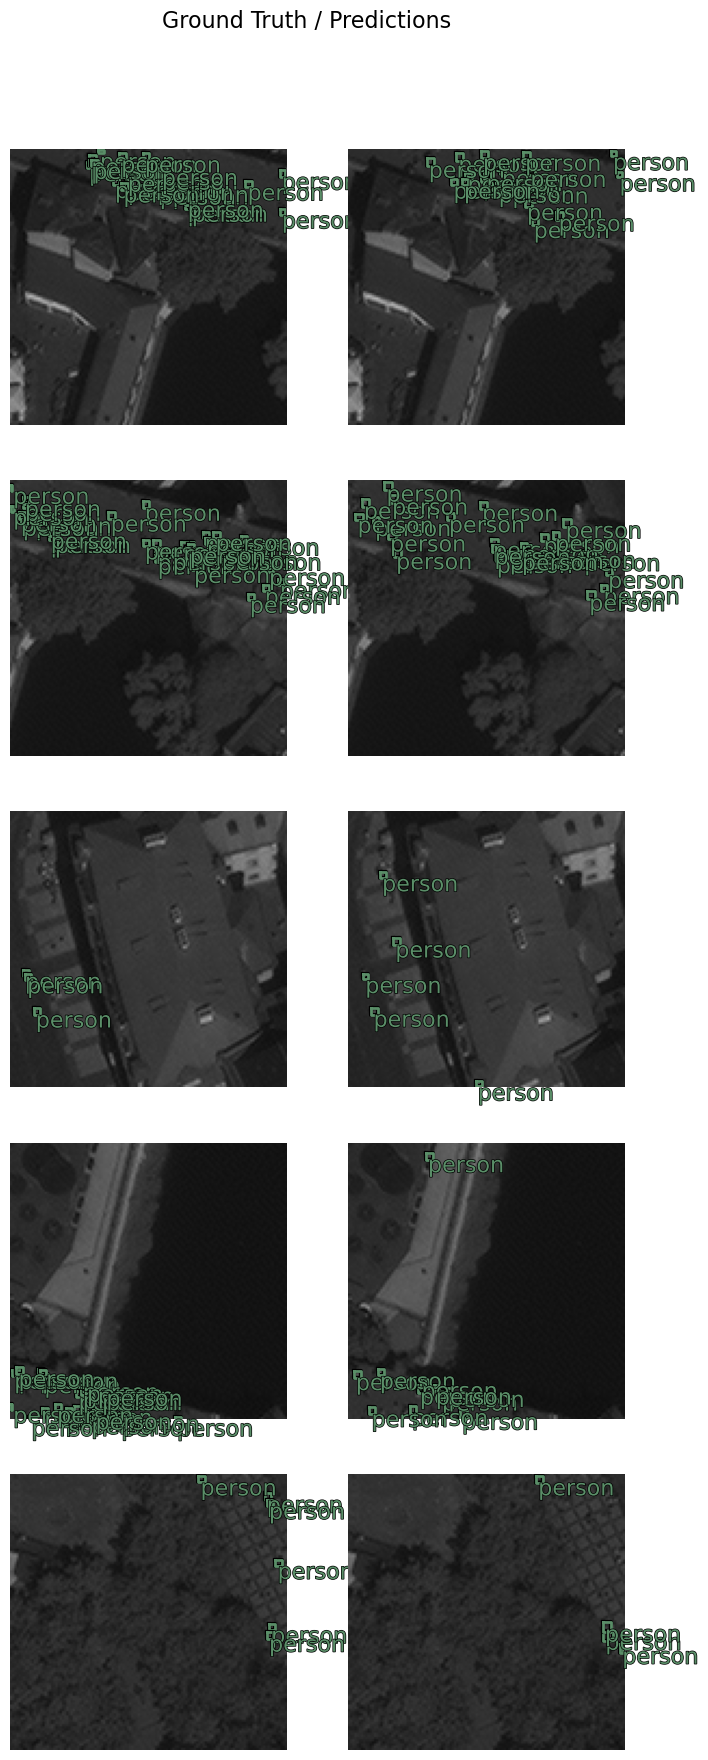

In [33]:
model.show_results()

In [34]:
model.save('faster_rcnn_data_aug_3_excel', publish=True)

Computing model metrics...


The `overwrite` parameter is no longer support on adding of items.


Published DLPK Item Id: f1569162981c44deaa2a1b834f2e6ba6


PosixPath('/arcgis/home/training_data_unzip_15cm/models/faster_rcnn_data_aug_3_excel')